In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41199, 21)

In [6]:
df.duplicated().sum()

15

In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7056\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [14]:
df.shape

(41177, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41177 entries, 0 to 41176
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41177 non-null  float64
 1   job             41177 non-null  object 
 2   marital         41177 non-null  object 
 3   education       41177 non-null  object 
 4   default         41177 non-null  object 
 5   housing         41177 non-null  object 
 6   loan            41177 non-null  object 
 7   contact         41177 non-null  object 
 8   month           41177 non-null  object 
 9   day_of_week     41177 non-null  object 
 10  duration        41177 non-null  float64
 11  campaign        41177 non-null  float64
 12  pdays           41177 non-null  float64
 13  previous        41177 non-null  float64
 14  poutcome        41177 non-null  object 
 15  emp.var.rate    41177 non-null  float64
 16  cons.price.idx  41177 non-null  float64
 17  cons.conf.idx   41177 non-null 

In [18]:
le = LabelEncoder()

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [53]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]= le.fit_transform(df[i])

<Axes: >

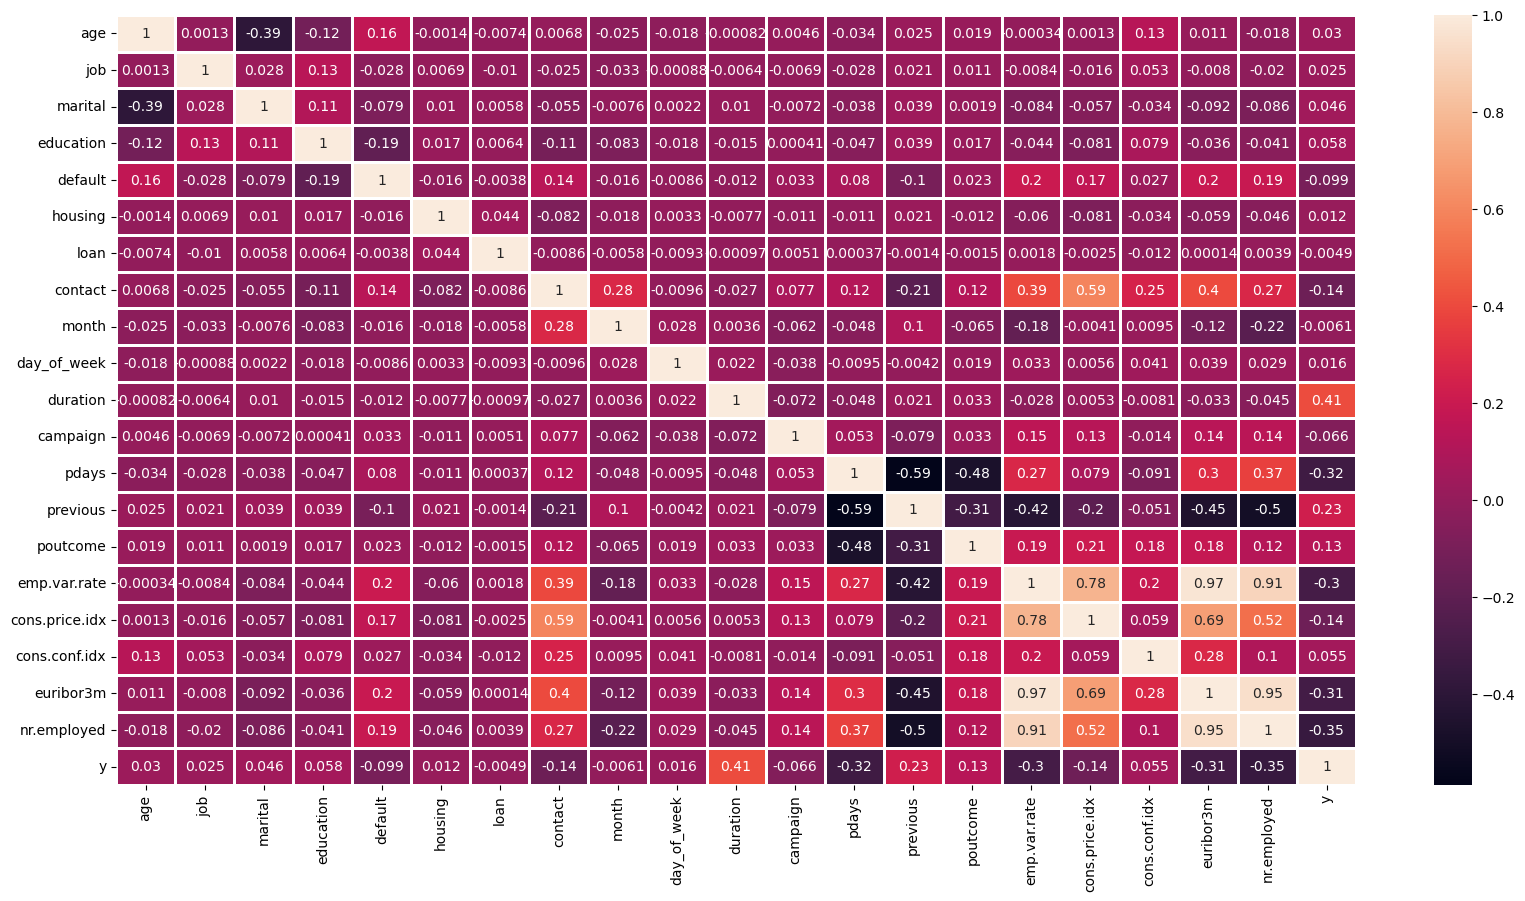

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=1,annot=True)

In [55]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [62]:
y.value_counts()

y
0    36538
1     4639
Name: count, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1)

In [65]:
Xnew,ynew = smote.fit_resample(X,y)

In [66]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.3,random_state=0)

In [67]:
sc = StandardScaler()

In [68]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [69]:
lr = LogisticRegression()

In [70]:
lr.fit(Xtrain,ytrain)

LogisticRegression()

In [72]:
ypred = lr.predict(Xtest)

In [73]:
confusion_matrix(ytest,ypred)

array([[9419, 1419],
       [1158, 9927]], dtype=int64)

In [74]:
accuracy_score(ytest,ypred)

0.8824522191305935

In [ ]:
# Logestic Regression predicting 88% 

# SVC Linear Model

In [75]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.3,random_state=0)
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [76]:
linear_model = SVC(kernel='linear')

In [77]:
linear_model.fit(Xtrain,ytrain)

SVC(kernel='linear')

In [78]:
ypred=linear_model.predict(Xtest)

In [81]:
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[ 9233  1605]
 [  927 10158]]
0.8845048579117821


In [ ]:
# SVM linear model predicting 88% but better than Logestic Regression model 

# knn Model

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.3,random_state=0)
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [83]:
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [84]:
knn_model.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [85]:
ypred=knn_model.predict(Xtest)

In [86]:
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[ 9622  1216]
 [  598 10487]]
0.9172558500205263


In [ ]:
#KNN model predicting 92% but better than Logestic Regression & SVM linear model 

## SVM kernel Model

In [87]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.3,random_state=0)
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [88]:
kernel_model = SVC(kernel='rbf',random_state=0)

In [89]:
kernel_model.fit(Xtrain,ytrain)

SVC(random_state=0)

In [90]:
ypred=kernel_model.predict(Xtest)

In [91]:
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[ 9700  1138]
 [  574 10511]]
0.9219084979245541


In [ ]:
#Kernel model model predicting 92% but better than All the above models

# Naive Model

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.3,random_state=0)
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [92]:
model = GaussianNB()

In [93]:
model.fit(Xtrain,ytrain)

GaussianNB()

In [94]:
ypred = model.predict(Xtest)

In [95]:
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[8510 2328]
 [2336 8749]]
0.787255393878575


In [ ]:
#Kernel model model predicting 79% and a average model

# Decision Tree

In [97]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.3,random_state=0)
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [98]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [100]:
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [101]:
ypred = dt.predict(Xtest)

In [102]:
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[ 9992   846]
 [  644 10441]]
0.9320348492450851


In [ ]:
# Decision Tree Model predicting 93% and better than all the above Models

# Random Forest Model

In [103]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.3,random_state=0)
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [104]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [105]:
rf.fit(Xtrain,ytrain)

RandomForestClassifier(criterion='entropy', random_state=0)

In [106]:
ypred = rf.predict(Xtest)

In [107]:
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[10175   663]
 [  330 10755]]
0.9547051042284359


In [ ]:
# Random Forest model is the far best model and accurately predicting 95%